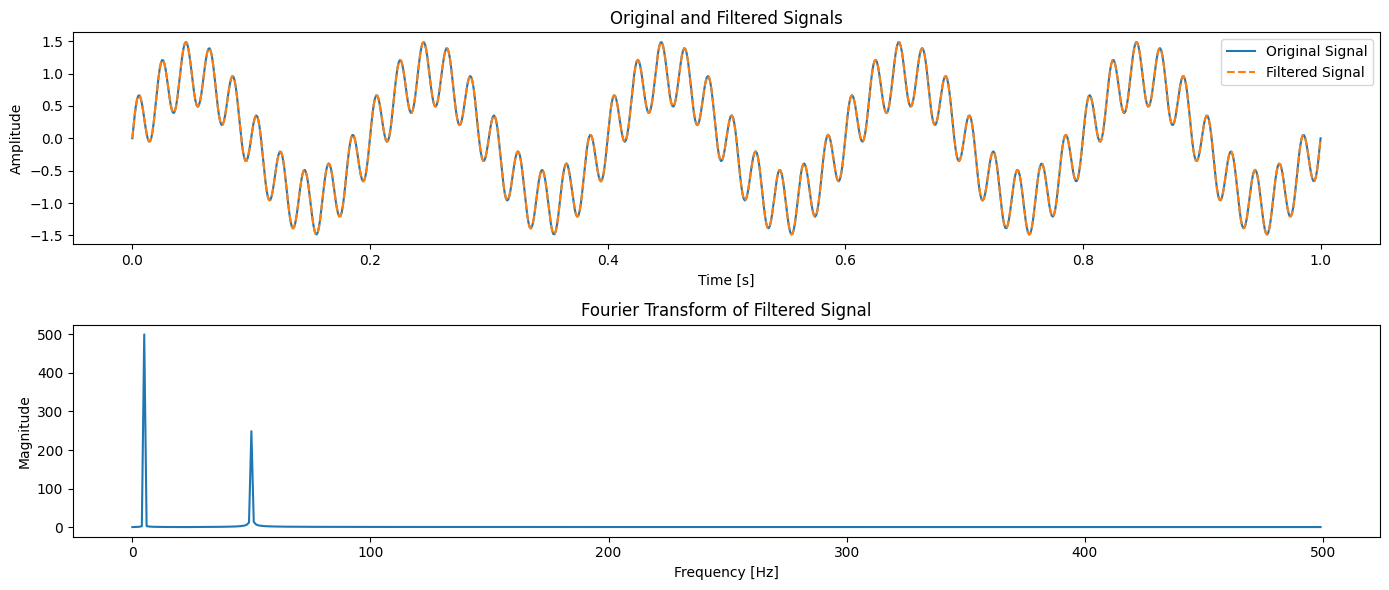

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Define the sampling frequency and other filter parameters
Fs = 1000  # Sample frequency (Hz)
cutoff = Fs / 4  # Cutoff frequency (Hz)
nyquist = Fs / 2

# Design a Butterworth lowpass filter
order = 4
b, a = butter(order, cutoff / nyquist, btype='low')

# Generate a sample signal (for demonstration)
t = np.linspace(0, 1.0, Fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Apply the filter to the signal
y = filtfilt(b, a, x)

# Compute the Fourier transform of the filtered signal
xf = np.fft.fft(y)
xf = np.abs(xf[:len(xf)//2])
frequencies = np.fft.fftfreq(len(y), 1/Fs)[:len(xf)]

# Plot the original and filtered signals
plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(t, x, label='Original Signal')
plt.plot(t, y, label='Filtered Signal', linestyle='--')
plt.legend()
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title('Original and Filtered Signals')

# Plot the Fourier transform of the filtered signal
plt.subplot(2, 1, 2)
plt.plot(frequencies, xf)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Fourier Transform of Filtered Signal')

plt.tight_layout()
plt.show()


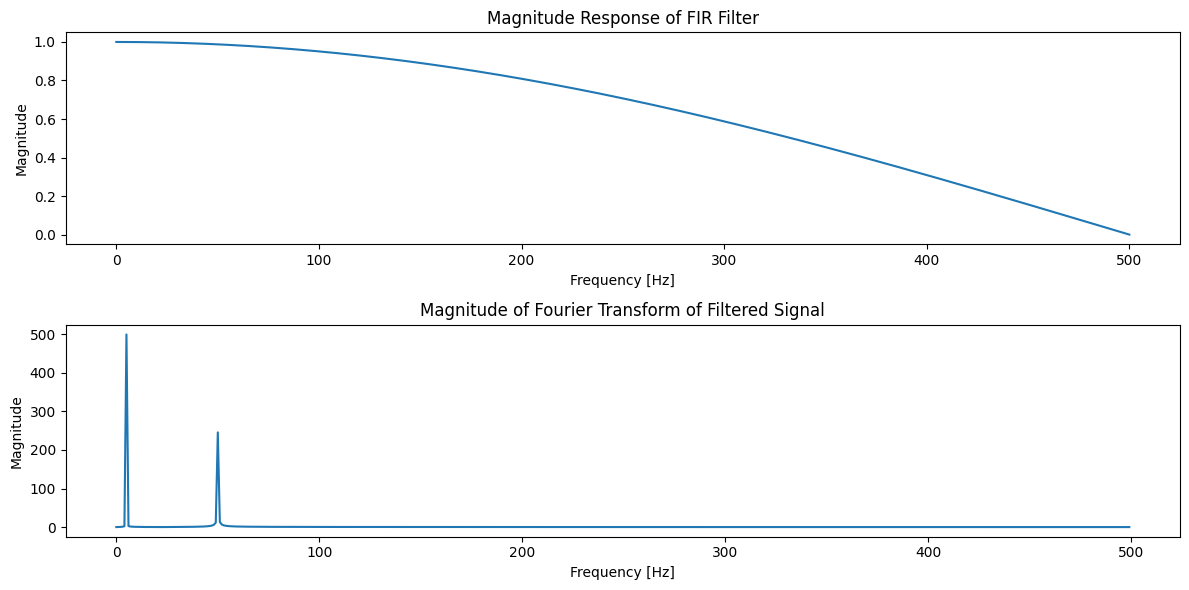

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter, freqz

# Define the sampling frequency and other filter parameters
Fs = 1000  # Sample frequency (Hz)
cutoff = Fs / 4  # Cutoff frequency (Hz)
nyquist = Fs / 2

# Design a FIR lowpass filter
order = 1
fir_coefficients = firwin(order + 1, cutoff / nyquist)

# Generate a sample signal (for demonstration)
t = np.linspace(0, 1.0, Fs)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Apply the FIR filter to the signal
y = lfilter(fir_coefficients, 1.0, x)

# Compute the frequency response of the FIR filter
w, h = freqz(fir_coefficients, worN=8000)
frequencies = w * nyquist / np.pi

# Compute the Fourier transform of the filtered signal
xf = np.fft.fft(y)
xf_magnitude = np.abs(xf[:len(xf)//2])
frequencies_signal = np.fft.fftfreq(len(y), 1/Fs)[:len(xf_magnitude)]

# Plot the magnitude response of the FIR filter
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(frequencies, np.abs(h))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude Response of FIR Filter')

# Plot the magnitude of the Fourier transform of the filtered signal
plt.subplot(2, 1, 2)
plt.plot(frequencies_signal, xf_magnitude)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.title('Magnitude of Fourier Transform of Filtered Signal')

plt.tight_layout()
plt.show()
